In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="mr.saiteja88",
    database="student_performance"
)

print("Database connection successful!")

Database connection successful!


In [2]:
students = pd.read_sql("SELECT * FROM students", conn)
attendance = pd.read_sql("SELECT * FROM attendance", conn)
marks = pd.read_sql("SELECT * FROM marks_subjectwise", conn)

students, attendance, marks

C:\Users\sai teja\AppData\Local\Temp\ipykernel_5164\1763273638.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  students = pd.read_sql("SELECT * FROM students", conn)
C:\Users\sai teja\AppData\Local\Temp\ipykernel_5164\1763273638.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  attendance = pd.read_sql("SELECT * FROM attendance", conn)
C:\Users\sai teja\AppData\Local\Temp\ipykernel_5164\1763273638.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  marks = pd.read_sql("SELECT * FROM marks_subjectwise", conn)


(   student_id    name department  semester
 0           1     Sai        ECE         5
 1           2    Teja        ECE         5
 2           3     Ram        ECE         5
 3           4  Laxman        ECE         5
 4           5   Arjun        ECE         5,
    student_id  attendance_percentage
 0           1                     85
 1           2                     78
 2           3                     92
 3           4                     70
 4           5                     65,
    student_id  signals  networks  analog  digital
 0           1       72        65      70       68
 1           2       55        60      58       62
 2           3       80        78      75       82
 3           4       45        50      48       52
 4           5       35        40      38       42)

In [3]:
df = students.merge(attendance, on="student_id")
df = pd.merge(df, marks, on="student_id")

df

,student_id,name,department,semester,attendance_percentage,signals,networks,analog,digital
0,1,Sai,ECE,5,85,72,65,70,68
1,2,Teja,ECE,5,78,55,60,58,62
2,3,Ram,ECE,5,92,80,78,75,82
3,4,Laxman,ECE,5,70,45,50,48,52
4,5,Arjun,ECE,5,65,35,40,38,42


In [4]:
df["average_marks"] = df[["signals", "networks", "analog", "digital"]].mean(axis=1)

df["status"] = df.apply(lambda row: "Pass" if row["average_marks"] >= 40 and row["attendance_percentage"] >= 75 else "Fail", axis=1)

df[["student_id", "name", "average_marks", "attendance_percentage", "status"]]

,student_id,name,average_marks,attendance_percentage,status
0,1,Sai,68.75,85,Pass
1,2,Teja,58.75,78,Pass
2,3,Ram,78.75,92,Pass
3,4,Laxman,48.75,70,Fail
4,5,Arjun,38.75,65,Fail


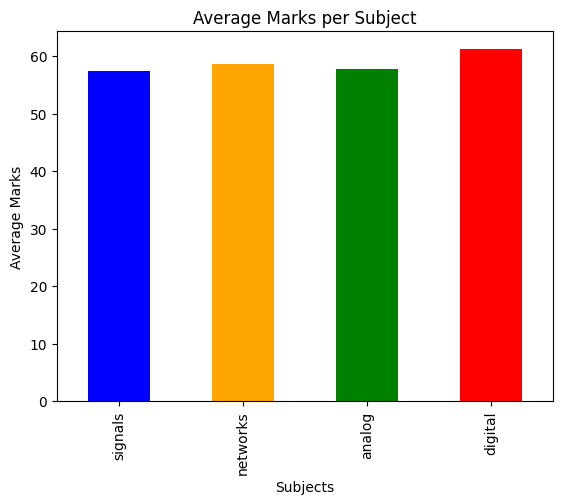

In [5]:
subjectwise_avg = df[["signals", "networks", "analog", "digital"]].mean()

subjectwise_avg.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title("Average Marks per Subject")
plt.xlabel("Subjects")
plt.ylabel("Average Marks")
plt.show()

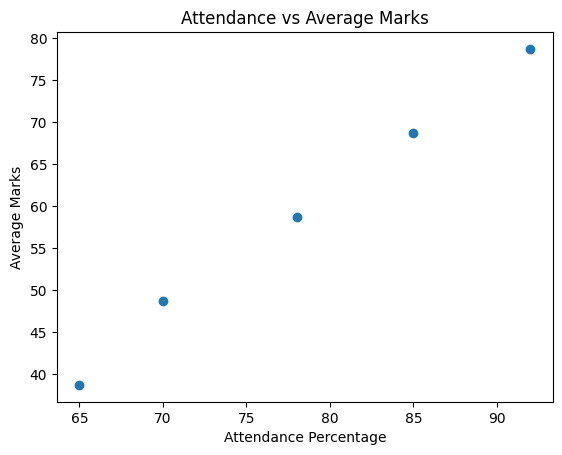

In [6]:
plt.scatter(df["attendance_percentage"], df["average_marks"])
plt.title("Attendance vs Average Marks")
plt.xlabel("Attendance Percentage")
plt.ylabel("Average Marks")
plt.show()

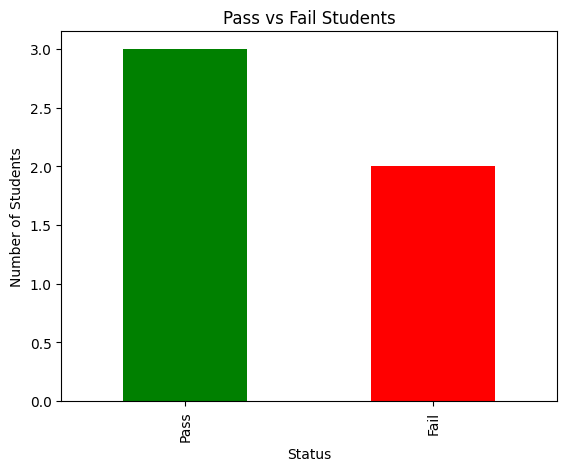

In [7]:
df["status"].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Pass vs Fail Students")
plt.xlabel("Status")
plt.ylabel("Number of Students")
plt.show()

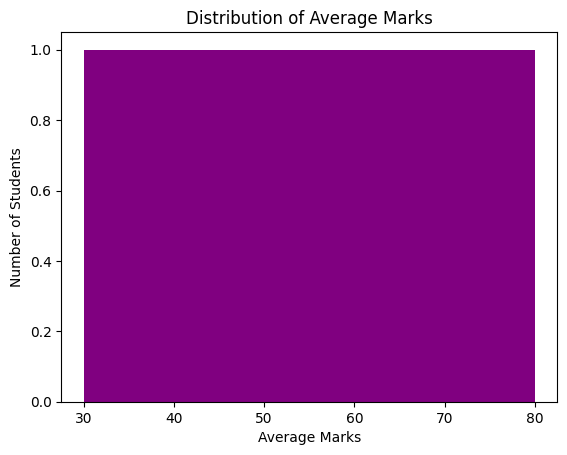

In [8]:
df["average_marks"].plot(kind='hist', bins=[30, 40, 50, 60, 70, 80], color='purple')
plt.title("Distribution of Average Marks")
plt.xlabel("Average Marks")
plt.ylabel("Number of Students")
plt.show()

## Insights from Student Performance Analysis

- Students with attendance below 75% generally have lower average marks.
- Digital Electronics shows the highest average score among subjects.
- Most students who failed have average marks below 50.
